In [737]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [739]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros. Los datos están disponibles en:

https://www.kaggle.com/c/titanic/data?select=train.csv

In [741]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [671]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
titanic_train.shape

(891, 12)

In [613]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [405]:
titanic_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [407]:
titanic_test.shape

(418, 11)

In [409]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [743]:
titanic_test = pd.merge(titanic_test, gender_submission[['PassengerId', 'Survived']], on='PassengerId')

In [745]:
titanic_test.shape

(418, 12)

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [747]:
titanic_train.columns,titanic_test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
       dtype='object'))

In [749]:
# Calcular la cantidad de valores nulos en cada columna
cantidad_nulos = titanic_train.isnull().sum()

# Calcular el porcentaje de valores nulos en cada columna
total_filas = titanic_train.shape[0]
porcentaje_nulos = (cantidad_nulos / total_filas) * 100

In [251]:
# Calcular la cantidad de valores nulos en cada columna
cantidad_nulos = titanic_test.isnull().sum()

# Calcular el porcentaje de valores nulos en cada columna
total_filas = titanic_test.shape[0]
porcentaje_nulos = (cantidad_nulos / total_filas) * 100

In [751]:
cantidad_nulos,porcentaje_nulos

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId     0.000000
 Survived        0.000000
 Pclass          0.000000
 Name            0.000000
 Sex             0.000000
 Age            19.865320
 SibSp           0.000000
 Parch           0.000000
 Ticket          0.000000
 Fare            0.000000
 Cabin          77.104377
 Embarked        0.224467
 dtype: float64)

2. En base al resultado anterior. ¿Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [625]:
#elimino la columna cabin, que es la que tiene el porcentaje de nulos mas alto

titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [753]:
titanic_train.drop(labels = "Cabin", axis = "columns", inplace = True)
titanic_test.drop(labels = "Cabin", axis = "columns", inplace = True)

In [755]:
titanic_train.shape,titanic_test.shape

((891, 11), (418, 11))

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar cómo se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

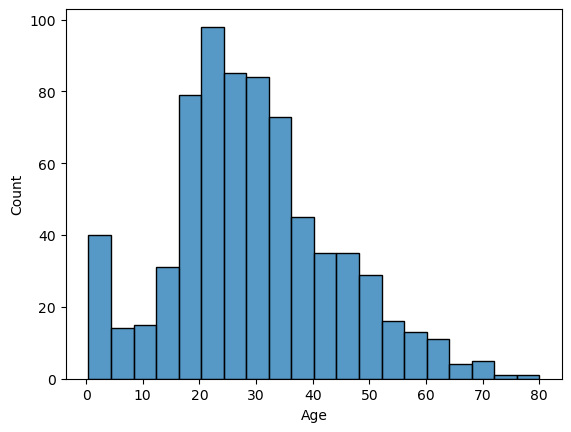

In [757]:
sns.histplot(titanic_train, x = "Age")

In [759]:
#rellenar los valores nulos de Edad con el promedio de edades
mean_value = titanic_test['Age'].mean()
titanic_test['Age'].fillna(mean_value, inplace=True)

In [761]:
mean_value = titanic_train['Age'].mean()
titanic_train['Age'].fillna(mean_value, inplace=True)

In [691]:
titanic_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0


In [693]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [763]:
moda = titanic_train.Embarked.mode()[0]
titanic_train.Embarked = titanic_train.Embarked.fillna(moda)

In [765]:
mediana = titanic_test.loc[titanic_test.Pclass==3, "Fare"].median()
titanic_test.Fare = titanic_test.Fare.fillna(mediana)

In [767]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [769]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

In [840]:
sns.countplot(data = titanic_train, x = "Pclass", hue = "Survived")

ValueError: Could not interpret input 'Pclass'

AttributeError: 'numpy.int64' object has no attribute 'startswith'

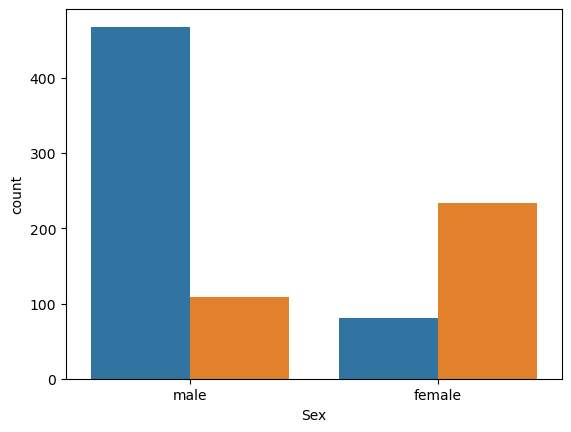

In [773]:
sns.countplot(data = titanic_train, x = "Sex", hue = "Survived")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

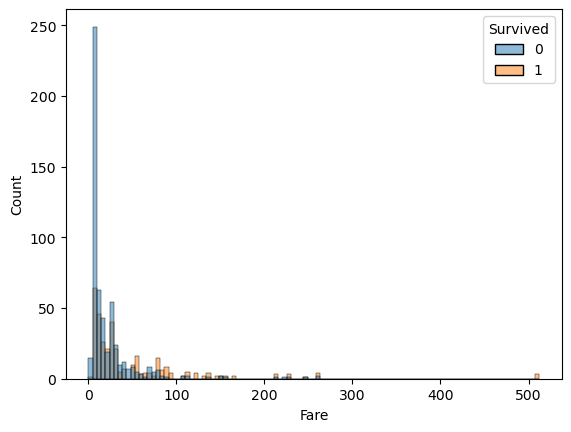

In [775]:
sns.histplot(titanic_train, x = "Fare", hue= "Survived")

5. Verificar columnas del DataFrame e identificar sobre cúales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing.

In [713]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [777]:
titanic_test = pd.get_dummies(
    titanic_test,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True
)

titanic_train = pd.get_dummies(
    titanic_train,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True
)

In [779]:
len(titanic_train.columns), len(titanic_test.columns)

(13, 13)

In [781]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Pclass_2          bool
Pclass_3          bool
Embarked_Q        bool
Embarked_S        bool
Sex_male          bool
dtype: object

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training.

In [783]:
titanic_train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace = True)
titanic_test.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace = True)

In [791]:
titanic_train.columns, len(titanic_test.columns)

(Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
        'Embarked_Q', 'Embarked_S', 'Sex_male'],
       dtype='object'),
 10)

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training.

In [797]:
titanic_train['IsMinor'] = (titanic_train['Age'] <= 16).astype(int)
titanic_test['IsMinor'] = (titanic_test['Age'] <= 16).astype(int)

In [799]:
titanic_train.head(1)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.25,False,True,False,True,True,0


8. Ajustar modelo considerando todas las variables del dataset de testing.

In [578]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [809]:
X_titanic_train = titanic_train.loc[:,titanic_train.columns!="Survived"]
y_titanic_train = titanic_train.loc[:,titanic_train.columns=="Survived"]

In [815]:
# Crear el modelo
modelo = LogisticRegression(max_iter = 1000000)

#ajustar modelo
modelo.fit(X_titanic_train,y_titanic_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [817]:
X_titanic_test = titanic_test.loc[:,titanic_train.columns!="Survived"]
y_titanic_test = titanic_test.loc[:,titanic_train.columns=="Survived"]

In [823]:
y_pred = modelo.predict(X_titanic_test)
y_pred_proba = modelo.predict_proba(X_titanic_test)[:,1]

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived
Feature names seen at fit time, yet now missing:
- Age


10. Calcular matriz de confusión

11. Calcular Accuracy

12. Calcular sensibilidad

13. Calcular especificidad

14. Graficar curva de ROC

In [ ]:
recta_x = [i for i in np.arange(0,1,0.01)]
sns.scatterplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x=recta_x, y = recta_x, color="r", ls = "--")

15. Calcular valor de área bajo la curva de ROC